# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Are you excited to dive into data work for an exciting project at The Recording Academy? You know, the non-profit organization behind the Grammy Awards!

In this project, you'll work on real data from both websites owned by The Recording Academy, the non-profit organization behind the famous Grammy Awards. As you just learned, Ray Starck, the VP of Digital Strategy, decided to split the websites into grammy.com and recordingacademy.com to better serve the Recording Academy's various audience needs.

Now, you are tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_df`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy`

**C.** Preview the dataframes to familiarize yourself with the data.

All files needed can be found in the `datasets` folder.

In [63]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

In [5]:
# preview full_df dataframe
print(full_df.head())

         date  visitors  pageviews  sessions  bounced_sessions  \
0  2017-01-01      9611      21407     10196              6490   
1  2017-01-02     10752      25658     11350              7055   
2  2017-01-03     11425      27062     12215              7569   
3  2017-01-04     13098      29189     13852              8929   
4  2017-01-05     12234      28288     12990              8105   

   avg_session_duration_secs  awards_week  awards_night  
0                         86            0             0  
1                        100            0             0  
2                         92            0             0  
3                         90            0             0  
4                         95            0             0  


In [6]:
# preview rec_academy dataframe
print(rec_academy.head())

         date  visitors  pageviews  sessions  bounced_sessions  \
0  2022-02-01       928       2856      1092               591   
1  2022-02-02      1329       3233      1490               923   
2  2022-02-03      1138       3340      1322               754   
3  2022-02-04       811       2552       963               534   
4  2022-02-05       541       1530       602               326   

   avg_session_duration_secs  awards_week  awards_night  
0                        148            0             0  
1                         90            0             0  
2                        127            0             0  
3                        142            0             0  
4                        111            0             0  


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_df`. See if you can spot the days the Grammys awards are hosted.

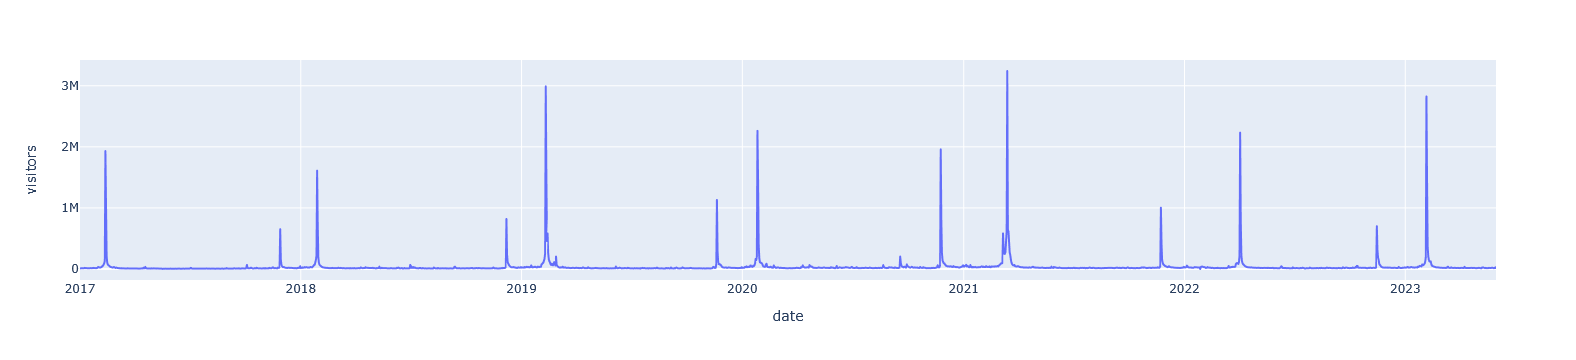

In [9]:
# Plot a line chart of the visitors on the site.
line = px.line(full_df, x='date', y='visitors')
line.show()

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

*(Double-click to this cell to write your answer)*

It seems that the number of visitors on the website typically spike when the nominees are first announced, and then spike again (almost twice as much) when the Grammys are hosted. Further, during the time between the nominee announcement and the show itself, the number of visitors drops drammatically, but still maintains a slightly larger than normal amount of visitors. Additionally, the spikes themselves only seem to span over roughly 2-3 weeks.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [15]:
group = full_df.groupby('awards_night')['visitors'].mean()
print(group)

awards_night
0     32388.28
1   1389590.23
Name: visitors, dtype: float64


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

*(Double-click to this cell to write your answer)*

As one would expect, there is a drastic increase in the average daily amount of traffic on award nights versus regular days, which was a difference of 1,357,201.95 website visits. 

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [16]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date'] < '2022-02-01'].copy()
grammys = full_df[full_df['date'] >= '2022-02-01'].copy()

In [17]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [19]:
# print the shape of the combined_site dataframe
print(combined_site.shape)

(1857, 8)


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has the `combined_site`, `rec_academy`, and `grammys` dataframes as entries. e.g. If the 3 dataframes were `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

In [43]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Divide the `pageviews` by `sessions`</span>

This can be achieved by using the following template:

```python
for frame in frames:
    frame['new_col'] = frame['col_A'] / frame['col_B']
```

In [44]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

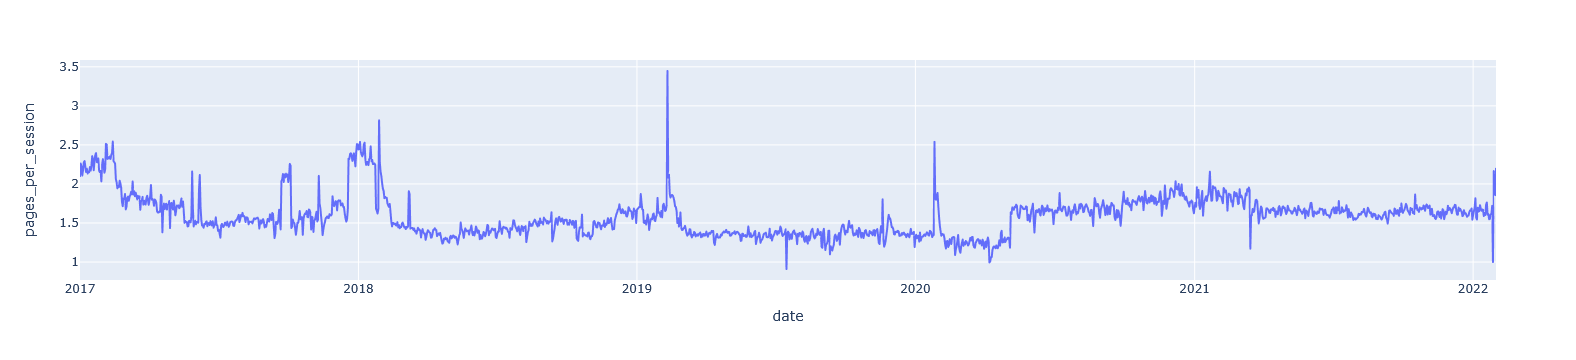

In [45]:
# combined_site graph
cs_line = px.line(combined_site, x='date', y='pages_per_session')
cs_line.show()

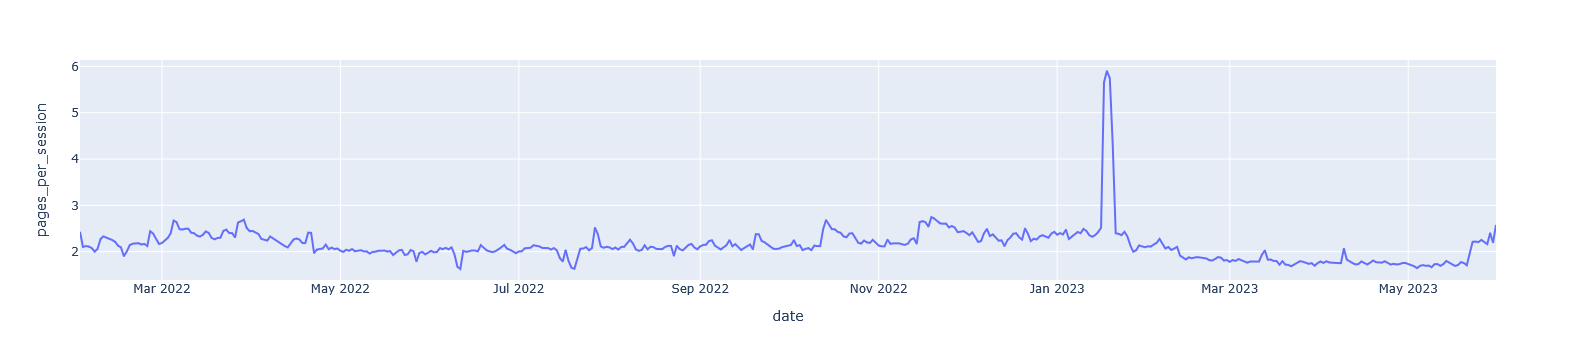

In [46]:
# grammys graph
g_line = px.line(grammys, x='date', y='pages_per_session')
g_line.show()

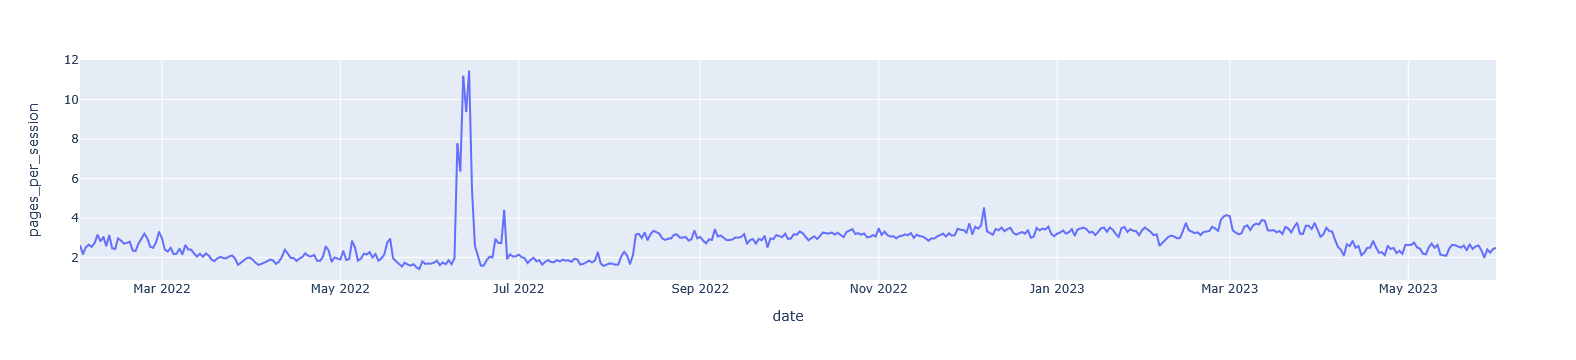

In [47]:
# rec_academy graph
ra_line = px.line(rec_academy, x='date', y='pages_per_session')
ra_line.show()

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

*(Double-click this cell to write your answer)*

When the websites were combined, pages_per_session was somewhat stable but relatively low. After the websites split, pages_per_session for both websites increased noticably, with rec_academy increasing more than grammys. This suggests that Ray Stark made a good decision by seperating the websites in an effort to improve engagement. If I had to guess, I would say that splitting the sites allowed each one to focus more on its specific content and purpose, and also could've made them easier to navigate.

## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need use the `.sum()` function both in the `sum_bounced` and `sum_sessions` calculations. Don't forget to multiply by `100` so that the answer appears as a percentage instead of a decimal.</span>

In [28]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.
    
    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    return 100 * sum_bounced / sum_sessions

**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

A template for getting the function to work will look like code below. Remember that this is NOT the print statement, you will still need to add that part.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** To get the bounce rate use `bounce_rate(frame)` </span>

```python
for frame in frames:
    my_value = my_function(frame)
```

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` just before the end of the curly brackets but after your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [58]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
# frames = [combined_site, rec_academy, grammys]
frame_names = ['combined_site','rec_academy','grammys']
x = 0

for frame in frames:
    rate = bounce_rate(frame)
    print(f'Bounce rate for {frame_names[x]}: {rate:0.2f}')
    x+=1

Bounce rate for combined_site: 41.58
Bounce rate for rec_academy: 33.67
Bounce rate for grammys: 40.16


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**C.** Another useful metric is how long on average visitors are staying on the website.

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites.
Print each one using an f-string.

In [64]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.
x = 0
for frame in frames:
    mean_avg_session = frame['avg_session_duration_secs'].mean()
    print(f'Average session duration for {frame_names[x]}: {mean_avg_session:0.2f} seconds')
    x+=1

Average session duration for combined_site: 102.85 seconds
Average session duration for rec_academy: 128.50 seconds
Average session duration for grammys: 82.99 seconds


**D.** What can you say about these two metrics as it relates to each of the websites?

*(Double-click this cell to write your answer)*

The bounce rates of both combined_site and grammys are higher than rec_academy, meaning that, on average, visitors are staying on the rec_academy website for longer or atleast not instantly clicking off as often. This could mean that people are instantly enjoying the content more, or finding what they're looking for easily. Additionally, grammys had the shortest average of the average session duration, and the rec_academy had the longest, with combined_site coming inbetween them. This could mean that rec_academy is good at keeping their visitors entertained for longer periods of time, and could have more enjoyable content. All in all, it seems clear that grammys falls behind rec_academy and combined_site in both metrics.


# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demographics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [67]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [68]:
# preview the age_grammys file. the age_tra will look very similar.
print(age_grammys.head())

  age_group  pct_visitors
0     18-24         27.37
1     25-34         24.13
2     35-44         18.72
3     45-54         13.57
4     55-64          9.82


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [69]:
# create the website column
age_grammys['website'] = 'Grammys'
age_tra['website'] = 'Recording Academy'

**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** Remember that you need to put your dataframe variables inside of a **list** first then pass that as your input of `pd.concat()`</span>

In [70]:
# use pd.concat to join the two datasets
age_df = pd.concat([age_grammys, age_tra])
print(age_df.shape)

(12, 3)


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

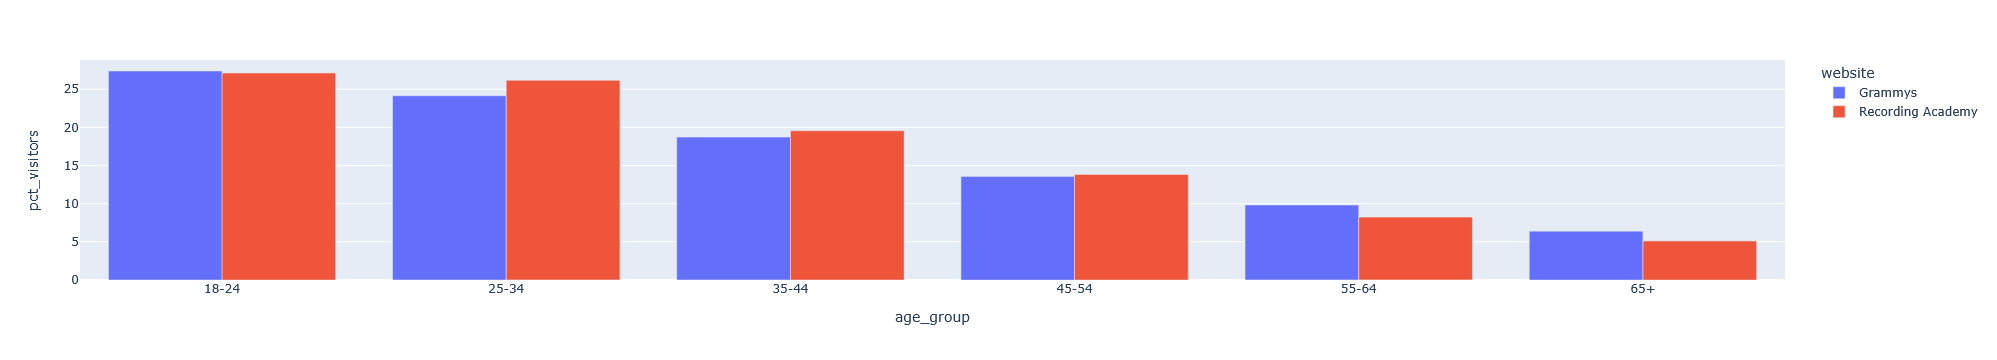

In [71]:
# Create bar chart
bar = px.bar(age_df, x='age_group', y='pct_visitors', color='website', barmode='group')
bar.show()

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

*(Double-click to write in your answer)*

Looking at the chart above, its clear that ages 18-24 almost equally visit the Recording Academy and the Grammys websites. But, between the ages 25-44 more people visit the Recording Academy with a gradual shift towards the Grammys. After this, the ages between 55 and 65+ visit the Grammys website more. With the 45-54 age group visiting both the Recording Academy and the Grammys websites almost equally. From this, its clear that the Grammys appeals to the younger demographic (18-24), then skips the middle demographics, and reaches an older demographic (45-65+), whilst the Recording Academy has the same younger demographic (18-24), but continues to claim the younger demographic (25-45). However, the larger demographics are between 18-54, meaning that the Recording Academy receives more visitors, and this is mainly due to the 25-34 age demographic.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

*(Double-click to write your answer)*

Based on the work that I've done in this project, I would suggest that the Grammys and the Recording Academy continue to have separate websites. This is primarily due to the bounce rate and average session duration metrics shown above, which are both important indicators of user engagement and content relevence. From the information above, its clear that the Grammys have a lower bounce rate and session duration, compared to the Recording Academy and when they were combined. Meaning, that the Grammys need to improve their bounce rate by making the website more engaging upon landing and producing more enticing content (or redesign the landpage entirely). To improve their average session duration, the Grammys must produce longer and higher quality content on their website. 

Additionally, I believe that the combination of the Grammys and the Recording Academy is creating a messy set of data. The data is unable to show a clear distinction or difference between the Recording Academy and the Grammys. Which although the same company, have very different goals and purposes, and thus appeal to different groups. Further, the metrics gathered from the Grammys, when combined with those from the Recording Academy, seem to be bringing down the higher quality metrics generated from the Recording Academy. This could prevent us from realizing why exactly the site is performing poorly, and what exactly needs to be improved. 

All in all, I believe that keeping the websites separate would allow for more targeted improvements and clearer insights into each website's performance. And would also help to improve marketing efforts drastically due to the corrected specific metrics (demographics for example).

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [84]:
# Load in the data
mobile_users = pd.read_csv('datasets/mobile_users.csv')
desktop_users = pd.read_csv('datasets/desktop_users.csv')

In [85]:
# preview the desktop_users file
desktop_users.head(5)

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [86]:
# preview mobile_users file
mobile_users.head(5)

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [87]:
# change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns={'visitors': 'desktop_visitors'})
desktop_users.head(1)

,date,segment,desktop_visitors
0,2022-02-01,Desktop Traffic,10195


In [88]:
# drop the segment column from each dataframe
mobile_users = mobile_users.rename(columns={'visitors': 'mobile_visitors'})
mobile_users.head(1)

,date,segment,mobile_visitors
0,2022-02-01,Mobile Traffic,23494


**C.** Join the two dataframes together in a new variable called `segment_df`.

In [89]:
# join the two dataframes and preview the dataframe
segment_df = pd.merge(desktop_users, mobile_users, on='date')

**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [92]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
segment_df.head(1)

,date,segment_x,desktop_visitors,segment_y,mobile_visitors,total_visitors
0,2022-02-01,Desktop Traffic,10195,Mobile Traffic,23494,33689


To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [97]:
# filter and calculate the percentage share
filtered_segment_df = segment_df[segment_df['date'] >= '2023-04-01']

sum_total = filtered_segment_df['total_visitors'].sum()
sum_desktop = filtered_segment_df['desktop_visitors'].sum()

desktop_percent = 100 * sum_desktop / sum_total
mobile_percent = 100 - desktop_percent

print(f'Desktop visitors {desktop_percent} \nMobile visitors {mobile_percent}') 
print(sum_total)

Desktop visitors 31.836732979484516 
Mobile visitors 68.16326702051549
1428482


**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**

**What is the total number of visitors on the site during this timeframe?**

*(Double-click this cell to write your answer)*

Around 31.84% of visitors accessed the Grammys website using a desktop device, whilst 68.16% accessed the website using a mobile device. And, there were a total of 1,428,482 visitors on the Grammys website during this timeframe.

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

*(Double-click this cell to write your answer)*

The Grammys need to significantly improve their visit duration, and slightly improve their average pages per visit/session count. But are doing better than the AMA at keeping their bounce rate low, and gathering large amounts of traffic.
